# 1.1 Import Data and Required packages
- Importing pandas, Numpy, Matplotlib, Seaborn and warnings Library


In [21]:
# Basic Import
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
#Modeling
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor

import warnings


In [23]:
from xgboost import XGBRegressor

In [24]:

df = pd.read_csv('data/stud.csv')

In [25]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Preparing x and y variable 

In [26]:
x = df.drop(columns=['math_score'], axis=1)

In [27]:
y=df['math_score']

In [28]:
# create column Transformer with 3 types of transformers
num_feature = x.select_dtypes(exclude='object').columns
cat_feature = x.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numerical_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer, cat_feature),
        ('StandardScaler', numerical_transformer, num_feature)
    ]
)


In [29]:
x = preprocessor.fit_transform(x)

In [30]:
x

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [31]:
x.shape

(1000, 19)

In [32]:
## Separate dataset into train and test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)
x_train.shape, x_test.shape

((800, 19), (200, 19))

# create and Evaluation Function to give all metrics after model trainig


In [33]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [34]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train Model

    # Make Prediction
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    #Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2  = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for Training set")
    print("- Root mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print("---------------------------")

    print("Model Performace for Test set")
    print("- Root mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}". format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='* 35)
    print('\n')

Linear Regression
Model performance for Training set
- Root mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
---------------------------
Model Performace for Test set
- Root mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
---------------------------
Model Performace for Test set
- Root mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


K-Neighbors Regressor
Model performance for Training set
- Root mean Squared Error: 5.7079
- Mean Absolute Error: 4.5168
- R2 Score: 0.8555
---------------------------
Model Performace for Test set
- Root mean Squared Error: 7.2530
- Mean Absolute Error: 5.6210
- R2 Score: 0.7838


Decision Tree
Model performance for Training set
- Root mean Squared Error: 0.2795
- Mean Absolute Error: 0.0187
- R2 Score: 0.9997
---------------------------
Model Perfo

# Result

In [35]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_score']).sort_values(by=['R2_score'], ascending = False)

,Model Name,R2_score
0,Linear Regression,0.880433
4,Random Forest Regressor,0.853085
6,CatBoosting Regressor,0.851632
7,AdaBoost Regressor,0.843962
5,XGBRegressor,0.827797
1,Lasso,0.825320
2,K-Neighbors Regressor,0.783813
3,Decision Tree,0.714698


# Linear Regression


In [36]:
lin_model = LinearRegression(fit_intercept = True)
lin_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred) * 100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.04


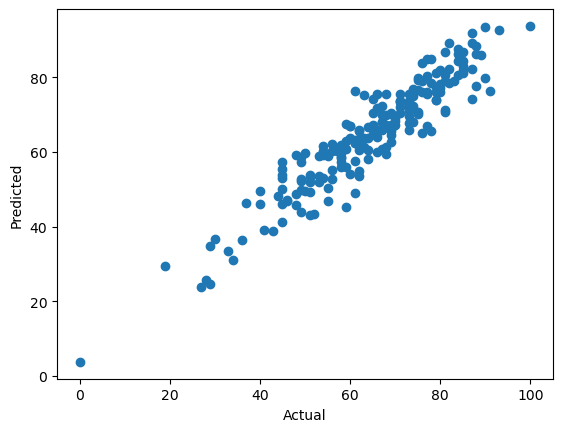

In [38]:
# Plot y_pred and y_test
plt.scatter(y_test, y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');



<Axes: xlabel='math_score'>

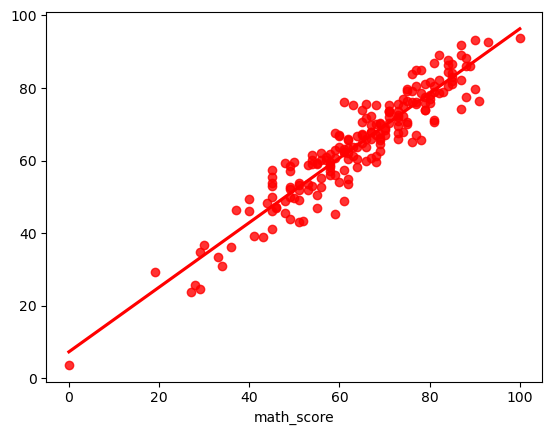

In [39]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')

# Difference between Actual and Predicted Values


In [41]:
pred_df = pd.DataFrame({"Actual Value": y_test, 'Predicted Value': y_pred, 'Difference': y_test - y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
